### #  '240,010,403' : 즉석식품

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/data/buy it again/임계치'

./chunk/

---

## # 즉석식품 데이터 사용 : '240,010,403'

In [3]:
retort_train = pd.read_excel('retort_train.xlsx')
retort_test = pd.read_excel('retort_test.xlsx')

In [4]:
retort_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
185,185,2018-01-01 00:00:46,"13,719,818","63,260","3,043,235","240,010,403",1
186,186,2018-01-01 00:00:46,"6,673,847","41,040","1,890,228","240,010,403",1


In [5]:
retort_train.tail(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9110140,99110140,2018-07-31 23:59:42,"20,144,042","19,800","3,875,978","240,010,403",1
9110255,99110255,2018-07-31 23:59:51,"3,447,745","32,500","3,675,138","240,010,403",1
9110269,99110269,2018-07-31 23:59:52,"2,918,378","17,900","3,877,762","240,010,403",1


In [6]:
retort_train.m_id.nunique()   # 약 52만명()

526724

In [7]:
train_mid = retort_train.m_id.unique()

In [8]:
# train_mid[0] 의 구매내역

retort_train[retort_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
7600948,87600948,2018-07-08 12:02:38,"23,119,672","9,777","3,807,057","240,010,403",1


---

### #  time interval 불러오기

In [9]:
tt = pd.read_csv('retort_train_time_interval.csv', header=None)

In [10]:
tt.head()

,0,1,2,3,4,5,6
0,52,2018-04-18T23:04:04.000+09:00,"1,010,299","3,000","3,569,399","240,010,403",1
1,1,2018-04-19T00:22:10.000+09:00,"1,010,299","5,500","3,574,914","240,010,403",1
2,36,2018-02-08T12:15:57.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
3,13,2018-02-21T12:05:27.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
4,102,2018-06-03T16:33:42.000+09:00,"1,011,295","15,900","3,714,756","240,010,403",1


In [11]:
tt.columns = ['time','biz_dt', 'm_id', 'order_price', 'prod_no', 'old_admin_category_id', 'serv_cd']

In [12]:
tt = tt.iloc[:,:1]

In [13]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


---

# # t (interval) 분석해보자

In [14]:
tt.shape

(401967, 1)

In [15]:
tt = tt.dropna()  # t값 순수하게 얻은거야 - 중원대리님이 뽑아준거에서는 아마 없을거야!

In [16]:
# nan값 제거하고 얻은 shape : 13만 6천개 (전체 - distinct user의 수 (1개 제품 구매자 포함) )

tt.shape

(401967, 1)

In [17]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


In [18]:
#음 중원대리님이 뽑아주신 데이터에서는 0이 없어!

tt.time.value_counts()

1      14561
2      10792
3       9557
7       9515
6       9013
4       8946
5       8683
8       8376
14      8274
13      7707
10      7547
9       7514
12      7130
15      7119
11      6960
21      6908
16      6634
20      6603
17      6202
18      6152
22      6149
19      6005
28      5933
23      5425
27      5379
24      5366
26      5325
29      5287
25      5214
35      4837
       ...  
183      164
178      156
186      146
187      144
188      140
185      126
184      122
189      116
191      109
196      109
194      101
190       98
195       95
192       85
193       81
198       63
197       62
199       57
204       55
200       51
203       47
201       43
202       43
205       39
208       30
206       29
207       24
209       24
210       11
211        8
Name: time, Length: 211, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9275a33d68>]],
      dtype=object)

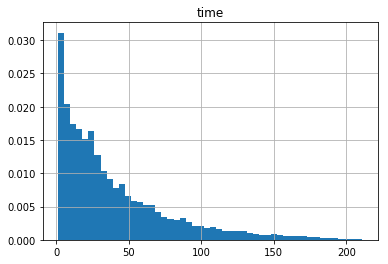

In [19]:
tt.hist(bins=50, density = True)

---

### # test id 데이터에서 뽑아오자

In [20]:
# Test_id : 테스트 데이터에서, unique한 id 1000개

test_id = retort_test.m_id.unique()[:1000]

In [21]:
len(test_id)

1000

---

In [22]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( bool(retort_train[retort_train.m_id == test_id[i]].shape[0]) 
              & bool(retort_test[retort_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

tf

In [23]:
len(test_id)

1000

In [24]:
len(test_id[tf]) # train data를 가지고있는 애들(67% 정도네!)

646

In [25]:
test_id_ = test_id[tf]

In [26]:
test_id_

array(['12,962,854', '17,508,303', '12,545,711', '21,195,556',
       '8,252,427', '22,520,016', '11,807,700', '4,065,638', '6,048,174',
       '23,366,868', '9,332,963', '4,067,717', '3,026,773', '13,720,984',
       '2,257,238', '23,765,265', '5,333,237', '7,193,233', '4,324,217',
       '1,678,859', '8,586,314', '7,007,071', '22,024,500', '14,262,829',
       '12,085,012', '2,065,460', '14,228,258', '21,404,415',
       '19,483,337', '4,052,848', '17,440,594', '3,025,816', '7,527,116',
       '10,112,410', '5,589,138', '3,527,814', '1,909,792', '2,550,649',
       '5,009,251', '16,707,713', '20,568,914', '3,945,596', '8,047,878',
       '18,283,227', '8,455,855', '8,729,799', '3,751,793', '9,880,252',
       '12,594,133', '21,672,568', '20,193,199', '2,143,590', '9,397,251',
       '14,304,955', '23,909,062', '16,605,140', '24,437,859',
       '1,081,366', '21,394,839', '10,446,704', '5,738,434', '19,798,814',
       '12,917,221', '1,524,663', '18,591,284', '16,244,881',
       '10,

---

# ----------------------------------------------------------------------------------------

---

## * lambda라는 개념을 다시 잡기.
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.


## # 1/time 을 감마 피팅 하자.
: time들의 분포를 알고있다 -> 단위 시간 당, 사건의 발생횟수를 맞춰줄 수 있다. 예를 들어, user들로부터 t=(3일,4일,5일,6일)이라는 time-interval을 얻게 되었다고 하자.

 이때, 단위 시간 당 사건의 발생 횟수 X=(1/3, 1/4, 1/5, 1/6)이고, 이 분포를 이용해 poisson(lambda)를 추정하는 것이다.

In [27]:
tt.mean()   # 평균 39일?

time    39.689395
dtype: float64

In [28]:
# tt의 inverse를 사용할 것이다.

tt_inver = 1/tt

In [29]:
tt_inver.head()

,time
0,0.019231
1,1.000000
2,0.027778
3,0.076923
4,0.009804


In [30]:
1/tt_inver.mean()

time    9.41034
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9275817da0>]],
      dtype=object)

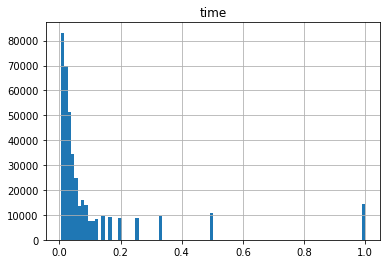

In [31]:
tt_inver.hist(bins=90)

In [32]:
# unit time - 일주일

tt_inver7 = tt_inver*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92756e2940>]],
      dtype=object)

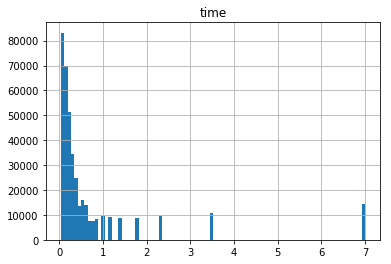

In [33]:
tt_inver7.hist(bins=90)

In [34]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [35]:
1/tt_inver7.mean()

time    1.344334
dtype: float64

/home/wmind/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


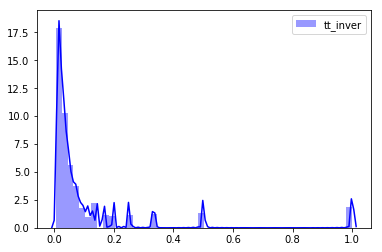

In [36]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # (1) gamma.fit으로 parameters 추정해볼게.

In [37]:
alpha, _ , scale = stats.gamma.fit(tt_inver, floc=0) 

In [38]:
alpha, scale

(0.6882067506495457, 0.15441011647401656)

In [39]:
1/scale    #Beta

6.476259605492076

---

### # 1주일 단위로

In [40]:
# 1주윌 단위로 계산 -> 하루 단위에서 7배 해주면 되지.

tt_inver7 = tt_inver*7

In [41]:
tt_inver7.time.value_counts()

7.000000    14561
3.500000    10792
2.333333     9557
1.000000     9515
1.166667     9013
1.750000     8946
1.400000     8683
0.875000     8376
0.500000     8274
0.538462     7707
0.700000     7547
0.777778     7514
0.583333     7130
0.466667     7119
0.636364     6960
0.333333     6908
0.437500     6634
0.350000     6603
0.411765     6202
0.388889     6152
0.318182     6149
0.368421     6005
0.250000     5933
0.304348     5425
0.259259     5379
0.291667     5366
0.269231     5325
0.241379     5287
0.280000     5214
0.200000     4837
            ...  
0.038251      164
0.039326      156
0.037634      146
0.037433      144
0.037234      140
0.037838      126
0.038043      122
0.037037      116
0.035714      109
0.036649      109
0.036082      101
0.036842       98
0.035897       95
0.036458       85
0.036269       81
0.035354       63
0.035533       62
0.035176       57
0.034314       55
0.035000       51
0.034483       47
0.034653       43
0.034826       43
0.034146       39
0.033654  

In [42]:
print(tt_inver.shape[0], sum(tt_inver7.time == 7.0)  )  # 40만개중에, 약 14,561 개가 time-interval=1이야

# tt_invr7 == 7 이라는 의미는, 1주일 단위에 구매가 '7번'일어나는 사람들의 frequency를 보여주는거야!(사실은, 하루에 한번 산 사람들!) 

401967 14561


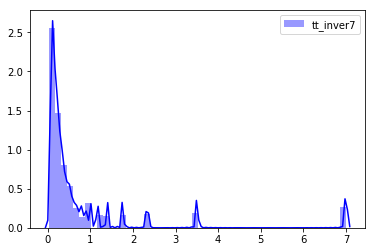

In [43]:
plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [44]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [45]:
alpha_, scale_

(0.6882067506495457, 1.0808708153181152)

In [46]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [47]:
alpha_*scale_   # tt_inver7.mean() == alpha_*scale_

0.7438625916820053

In [48]:
import scipy.stats as stats

In [49]:
y = stats.gamma.rvs(a = alpha_, loc=0, scale=scale_, size=1000, random_state=None)

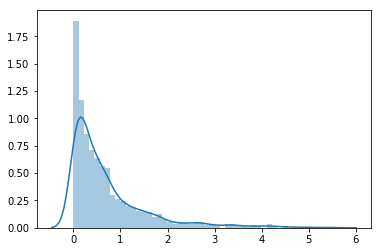

In [50]:
plt.figure()
sns.distplot(y, bins=50)


---

---

In [51]:
len(test_id_)

646

In [43]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

In [40]:
# 함수로 출력되는게 많게했어! & unit time을 하루.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()
    
    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

## # 646명에 대한, 확률값 저장. - 하루

In [44]:
## 출력 - unit time : 하루

c = {}

for j in range(len(test_id_)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha , beta=1/scale , tmean = tt.mean().item() , current=current_l[i])
        
        if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
            lamb_0 = lamb
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        #if i == 0:
            #print('user:[{}]'.format(j),'last order:', water_train.biz_dt[water_train.m_id == test_id_[j]][-1:], '\n')
            #print('min:',min, ', max:',max)
        #print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        #print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    #print('------------------------------------------------------------------------')
    #print('\n')

user: 0, start !
user: 1, start !
user: 2, start !
user: 3, start !
user: 4, start !
user: 5, start !
user: 6, start !
user: 7, start !
user: 8, start !
user: 9, start !
user: 10, start !
user: 11, start !
user: 12, start !
user: 13, start !
user: 14, start !
user: 15, start !
user: 16, start !
user: 17, start !
user: 18, start !
user: 19, start !
user: 20, start !
user: 21, start !
user: 22, start !
user: 23, start !
user: 24, start !
user: 25, start !
user: 26, start !
user: 27, start !
user: 28, start !
user: 29, start !
user: 30, start !
user: 31, start !
user: 32, start !
user: 33, start !
user: 34, start !
user: 35, start !
user: 36, start !
user: 37, start !
user: 38, start !
user: 39, start !
user: 40, start !
user: 41, start !
user: 42, start !
user: 43, start !
user: 44, start !
user: 45, start !
user: 46, start !
user: 47, start !
user: 48, start !
user: 49, start !
user: 50, start !
user: 51, start !
user: 52, start !
user: 53, start !
user: 54, start !
user: 55, start !
us

user: 437, start !
user: 438, start !
user: 439, start !
user: 440, start !
user: 441, start !
user: 442, start !
user: 443, start !
user: 444, start !
user: 445, start !
user: 446, start !
user: 447, start !
user: 448, start !
user: 449, start !
user: 450, start !
user: 451, start !
user: 452, start !
user: 453, start !
user: 454, start !
user: 455, start !
user: 456, start !
user: 457, start !
user: 458, start !
user: 459, start !
user: 460, start !
user: 461, start !
user: 462, start !
user: 463, start !
user: 464, start !
user: 465, start !
user: 466, start !
user: 467, start !
user: 468, start !
user: 469, start !
user: 470, start !
user: 471, start !
user: 472, start !
user: 473, start !
user: 474, start !
user: 475, start !
user: 476, start !
user: 477, start !
user: 478, start !
user: 479, start !
user: 480, start !
user: 481, start !
user: 482, start !
user: 483, start !
user: 484, start !
user: 485, start !
user: 486, start !
user: 487, start !
user: 488, start !
user: 489, s

In [45]:
xx = pd.DataFrame(c)

In [48]:
from scipy.signal import find_peaks


s = 0
idx = []  # peak가 존재하는 member id 저장
pday = [] # member의 peak-day저장

#height_ = []

for i in range(len(c)):
    p,height = find_peaks(c[i], height=0)
    #if bool(p)==True:
        #pday.append(p)
        #height_.append(list(height.values()))
        #idx.append( i )
        #s += p.shape[0]
    if bool(p)==True:
        pday.append( p )
    idx.append(bool(p))
    
    print(p)
    s += p.shape[0]

[]
[]
[]
[]
[]
[]
[9]
[]
[]
[26]
[11]
[]
[]
[]
[]
[]
[3]
[]
[]
[]
[]
[]
[]
[6]
[]
[14]
[19]
[]
[]
[]
[18]
[]
[]
[20]
[]
[]
[10]
[]
[13]
[]
[]
[]
[]
[]
[7]
[]
[]
[20]
[]
[]
[22]
[24]
[]
[]
[]
[5]
[7]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5]
[]
[]
[]
[]
[]
[13]
[16]
[3]
[]
[18]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17]
[]
[]
[19]
[]
[25]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[]
[]
[]
[]
[]
[]
[23]
[]
[27]
[]
[]
[4]
[3]
[]
[26]
[5]
[5]
[]
[7]
[]
[]
[21]
[20]
[27]
[]
[19]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[7]
[22]
[6]
[]
[2]
[9]
[24]
[]
[]
[22]
[]
[]
[10]
[1]
[]
[7]
[]
[]
[]
[]
[]
[]
[]
[21]
[]
[]
[5]
[]
[]
[]
[]
[14]
[1]
[]
[9]
[]
[]
[]
[]
[21]
[]
[]
[]
[]
[9]
[2]
[]
[14]
[]
[]
[24]
[11]
[]
[]
[12]
[]
[]
[]
[11]
[5]
[]
[]
[]
[]
[]
[]
[]
[]
[6]
[27]
[21]
[]
[]
[2]
[]
[8]
[]
[12]
[]
[]
[7]
[]
[]
[17]
[17]
[]
[10]
[12]
[]
[6]
[6]
[11]
[4]
[]
[7]
[14]
[]
[14]
[24]
[]
[]
[23]
[]
[]
[]
[]
[]
[4]
[11]
[]
[]
[]
[]
[]
[5]
[]
[23]
[26]
[]
[]
[]
[]
[18]
[]
[]
[]
[10]
[]
[]
[]
[]
[]
[25]
[]
[]

/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [49]:
idx

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 

In [50]:
peak_data_day = xx.T[idx]

In [51]:
peak_data_day

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6,0.047934,0.078066,0.113850,0.157040,0.210201,0.277236,0.364387,0.482308,0.650775,0.911117,...,0.010714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.041377,0.045910,0.050777,0.056018,0.061676,0.067804,0.074462,0.081723,0.089672,0.098412,...,0.321304,0.371576,0.436004,0.521541,0.640590,0.817628,0.909488,0.698839,0.561744,0.465412
10,0.176882,0.196948,0.220331,0.247925,0.280983,0.321304,0.371576,0.436004,0.521541,0.640590,...,0.205373,0.184139,0.165790,0.149774,0.135675,0.123166,0.111993,0.101954,0.092883,0.084648
16,0.467955,0.569097,0.714061,0.939174,0.791298,0.620413,0.504506,0.420728,0.357347,0.307723,...,0.085929,0.077172,0.069204,0.061922,0.055242,0.049092,0.043411,0.038148,0.033257,0.028702
23,0.321304,0.371576,0.436004,0.521541,0.640590,0.817628,0.909488,0.698839,0.561744,0.465412,...,0.123166,0.111993,0.101954,0.092883,0.084648,0.077137,0.070260,0.063939,0.058109,0.052716
25,0.128480,0.140613,0.154271,0.169761,0.187478,0.207939,0.231835,0.260110,0.294091,0.335696,...,0.335696,0.294091,0.260110,0.231835,0.207939,0.187478,0.169761,0.154271,0.140613,0.128480
26,0.100634,0.108181,0.116467,0.125607,0.135740,0.147037,0.159711,0.174029,0.190334,0.209071,...,0.759731,0.608158,0.503833,0.427646,0.369568,0.323828,0.286873,0.256394,0.230826,0.209071
30,0.089672,0.098412,0.108067,0.118789,0.130764,0.144227,0.159474,0.176882,0.196948,0.220331,...,0.561744,0.465412,0.394018,0.338990,0.295280,0.259722,0.230229,0.205373,0.184139,0.165790
33,0.034342,0.041874,0.050117,0.059178,0.069185,0.080294,0.092698,0.106636,0.122413,0.140418,...,0.922770,0.696561,0.550182,0.447722,0.371996,0.313751,0.267560,0.230032,0.198940,0.172758
36,0.116901,0.142327,0.172308,0.208189,0.251902,0.306325,0.375941,0.468142,0.596043,0.785339,...,0.105584,0.085265,0.067541,0.051944,0.038113,0.025765,0.014673,0.004654,0.000000,0.000000


In [52]:
peak_data_day.to_excel('peak_data_day.xlsx')

In [54]:
pday

[array([9]),
 array([26]),
 array([11]),
 array([3]),
 array([6]),
 array([14]),
 array([19]),
 array([18]),
 array([20]),
 array([10]),
 array([13]),
 array([7]),
 array([20]),
 array([22]),
 array([24]),
 array([5]),
 array([7]),
 array([14]),
 array([5]),
 array([13]),
 array([16]),
 array([3]),
 array([18]),
 array([14]),
 array([17]),
 array([19]),
 array([25]),
 array([8]),
 array([23]),
 array([27]),
 array([4]),
 array([3]),
 array([26]),
 array([5]),
 array([5]),
 array([7]),
 array([21]),
 array([20]),
 array([27]),
 array([19]),
 array([8]),
 array([7]),
 array([22]),
 array([6]),
 array([2]),
 array([9]),
 array([24]),
 array([22]),
 array([10]),
 array([1]),
 array([7]),
 array([21]),
 array([5]),
 array([14]),
 array([1]),
 array([9]),
 array([21]),
 array([9]),
 array([2]),
 array([14]),
 array([24]),
 array([11]),
 array([12]),
 array([11]),
 array([5]),
 array([6]),
 array([27]),
 array([21]),
 array([2]),
 array([8]),
 array([12]),
 array([7]),
 array([17]),
 array([1

In [86]:
len(d)

646

In [87]:
d[645]

[0.13164991530453826,
 0.14513572633603153,
 0.16010922607551034,
 0.17683038434745701,
 0.19562331515994447,
 0.21689728885635132,
 0.24117654437797617,
 0.26914349744850574,
 0.3017028813087034,
 0.34007957275634815,
 0.3859724516377365,
 0.44180501436033703,
 0.5111501820795396,
 0.5994833424310266,
 0.715582669922018,
 0.8742441793416885,
 0.9130913326682648,
 0.743283175887645,
 0.620118804470601,
 0.5270764915785734,
 0.4544515770774455,
 0.39624952076826614,
 0.34859177054751067,
 0.30886652487034316,
 0.2752541633148113,
 0.24644966705239568,
 0.22149348938059712,
 0.1996647327131196,
 0.18041151633197883,
 0.16330430962656017]

In [89]:
x = pd.DataFrame(d)

In [90]:
x.to_excel('peak.xlsx')

In [79]:
c[6]

[0.0598839891397482,
 0.0968334749884789,
 0.14002743536573262,
 0.1911836008031131,
 0.2527068094629936,
 0.32806532249138304,
 0.42243843402768855,
 0.5438836918855772,
 0.7055430229866443,
 0.9299530683611796,
 0.8079404180589363,
 0.6185702058800508,
 0.47911142973804566,
 0.37245786565411854,
 0.2883833244425125,
 0.22046332589924028,
 0.16447951600628735,
 0.1175554432833389,
 0.07766560845182727,
 0.04334400045316366,
 0.013504161644045973,
 -0.012675775668090123,
 -0.03582878954641989,
 -0.05645015668094566,
 -0.07493288923119813,
 -0.09159278607743211,
 -0.10668647703098856,
 -0.12042464073913897,
 -0.1329818357355767,
 -0.14450391423857853]

---

In [99]:
from scipy.signal import find_peaks


s = 0
idx = []  # peak가 존재하는 member id 저장
pday = [] # member의 peak-day저장

#height_ = []

for i in range(len(d)):
    p,height = find_peaks(d[i], height=0)
    #if bool(p)==True:
        #pday.append(p)
        #height_.append(list(height.values()))
        #idx.append( i )
        #s += p.shape[0]
    if bool(p)==True:
        pday.append( p )
    idx.append(bool(p))
    
    print(p)
    s += p.shape[0]

[]
[]
[]
[]
[]
[]
[9]
[]
[]
[26]
[11]
[]
[]
[]
[]
[]
[3]
[]
[]
[]
[]
[]
[]
[6]
[]
[14]
[19]
[]
[]
[]
[18]
[]
[]
[20]
[]
[]
[10]
[]
[13]
[]
[]
[]
[]
[]
[7]
[]
[]
[20]
[]
[]
[22]
[24]
[]
[]
[]
[5]
[7]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5]
[]
[]
[]
[]
[]
[13]
[16]
[3]
[]
[18]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17]
[]
[]
[20]
[]
[25]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[]
[]
[]
[]
[]
[]
[23]
[]
[27]
[]
[]
[4]
[3]
[]
[26]
[5]
[5]
[]
[7]
[]
[]
[21]
[20]
[27]
[]
[19]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[7]
[22]
[6]
[]
[2]
[9]
[24]
[]
[]
[22]
[]
[]
[10]
[1]
[]
[7]
[]
[]
[]
[]
[]
[]
[]
[21]
[]
[]
[5]
[]
[]
[]
[]
[14]
[1]
[]
[9]
[]
[]
[]
[]
[21]
[]
[]
[]
[]
[9]
[2]
[]
[14]
[]
[]
[24]
[11]
[]
[]
[12]
[]
[]
[]
[11]
[5]
[]
[]
[]
[]
[]
[]
[]
[]
[6]
[27]
[21]
[]
[]
[2]
[]
[8]
[]
[12]
[]
[]
[7]
[]
[]
[17]
[17]
[]
[10]
[12]
[]
[6]
[6]
[11]
[4]
[]
[7]
[14]
[]
[14]
[24]
[]
[]
[23]
[]
[]
[]
[]
[]
[4]
[11]
[]
[]
[]
[]
[]
[5]
[]
[23]
[26]
[]
[]
[]
[]
[18]
[]
[]
[]
[10]
[]
[]
[]
[]
[]
[26]
[]
[]

/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [93]:
s

210

In [94]:
210/646

0.32507739938080493

In [101]:
idx

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 

In [100]:
pday  # peak-day

[array([9]),
 array([26]),
 array([11]),
 array([3]),
 array([6]),
 array([14]),
 array([19]),
 array([18]),
 array([20]),
 array([10]),
 array([13]),
 array([7]),
 array([20]),
 array([22]),
 array([24]),
 array([5]),
 array([7]),
 array([14]),
 array([5]),
 array([13]),
 array([16]),
 array([3]),
 array([18]),
 array([14]),
 array([17]),
 array([20]),
 array([25]),
 array([8]),
 array([23]),
 array([27]),
 array([4]),
 array([3]),
 array([26]),
 array([5]),
 array([5]),
 array([7]),
 array([21]),
 array([20]),
 array([27]),
 array([19]),
 array([8]),
 array([7]),
 array([22]),
 array([6]),
 array([2]),
 array([9]),
 array([24]),
 array([22]),
 array([10]),
 array([1]),
 array([7]),
 array([21]),
 array([5]),
 array([14]),
 array([1]),
 array([9]),
 array([21]),
 array([9]),
 array([2]),
 array([14]),
 array([24]),
 array([11]),
 array([12]),
 array([11]),
 array([5]),
 array([6]),
 array([27]),
 array([21]),
 array([2]),
 array([8]),
 array([12]),
 array([7]),
 array([17]),
 array([1

In [103]:
x.T[idx].shape

(210, 30)

In [104]:
peak_data = x.T[idx]

In [105]:
peak_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6,0.059884,0.096833,0.140027,0.191184,0.252707,0.328065,0.422438,0.543884,0.705543,0.929953,...,0.013504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.053873,0.059699,0.065939,0.072637,0.079848,0.087630,0.096056,0.105208,0.115185,0.126103,...,0.386908,0.441249,0.508605,0.594193,0.706336,0.859005,0.931995,0.758373,0.632952,0.538517
10,0.221737,0.245513,0.272876,0.304701,0.342166,0.386908,0.441249,0.508605,0.594193,0.706336,...,0.255414,0.230367,0.208476,0.189181,0.172048,0.156733,0.142962,0.130512,0.119203,0.108885
16,0.540216,0.639119,0.771021,0.954549,0.836804,0.687106,0.576632,0.492004,0.425202,0.371176,...,0.110184,0.099196,0.089150,0.079931,0.071440,0.063595,0.056324,0.049567,0.043272,0.037392
23,0.386908,0.441249,0.508605,0.594193,0.706336,0.859005,0.931995,0.758373,0.632952,0.538517,...,0.156733,0.142962,0.130512,0.119203,0.108885,0.099432,0.090742,0.082725,0.075305,0.068420
25,0.163551,0.178386,0.194961,0.213604,0.234724,0.258848,0.286664,0.319085,0.357350,0.403182,...,0.403182,0.357350,0.319085,0.286664,0.258848,0.234724,0.213604,0.194961,0.178386,0.163551
26,0.129535,0.138950,0.149239,0.160532,0.172981,0.186774,0.202141,0.219365,0.238806,0.260918,...,0.811939,0.678049,0.578435,0.501626,0.440676,0.391170,0.350183,0.315699,0.286291,0.260918
30,0.115185,0.126103,0.138101,0.151348,0.166049,0.182457,0.200888,0.221737,0.245513,0.272876,...,0.632952,0.538517,0.464999,0.406207,0.358151,0.318152,0.284350,0.255414,0.230367,0.208476
33,0.044369,0.053989,0.064474,0.075945,0.088548,0.102459,0.117891,0.135110,0.154442,0.176301,...,0.941513,0.754136,0.619155,0.517751,0.438952,0.376029,0.324659,0.281945,0.245879,0.215027
36,0.146167,0.176799,0.212402,0.254282,0.304249,0.364869,0.439907,0.535097,0.659567,0.828583,...,0.132401,0.107481,0.085528,0.066042,0.048631,0.032980,0.018835,0.005990,0.000000,0.000000


In [106]:
peak_data.to_excel('peak_data.xlsx')

---

## # 헤비유져

In [67]:
id = ['16,119,861']

In [71]:
## 출력 없는경우

c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    #print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=id[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
            print('min:',min, ', max:',max)
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

min: 0.9559804626096855 , max: 0.9778711457741291
current: 2018-08-01 00:00:00 , current-last_order: 2.5714285714285716 , tmean_u: 5.669913557225202
scal_pred: 0.07984763197186848 , pred: 0.9577283818226128 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 2.7142857142857144 , tmean_u: 5.669913557225202
scal_pred: 0.08763020076450362 , pred: 0.9578987475702578 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 2.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.09605606881565115 , pred: 0.9580831955781509 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 3.0 , tmean_u: 5.669913557225202
scal_pred: 0.10520834409163779 , pred: 0.9582835451364513 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 3.142857142857143 , tmean_u: 5.6699135

In [73]:
min, max

(0.9559804626096855, 0.9778711457741291)

In [74]:
max-min

0.021890683164443647

In [76]:
(0.9763824663665764-min)/(max-min)

0.9319948401623791

In [69]:
c[0]

[0.07984763197186848,
 0.08763020076450362,
 0.09605606881565115,
 0.10520834409163779,
 0.11518507513454863,
 0.12610276112948132,
 0.13810089846567983,
 0.1513479385465029,
 0.16604919446367403,
 0.18245748093505848,
 0.2008876533762715,
 0.22173681465870923,
 0.2455129334464757,
 0.27287623890389595,
 0.3047005307097158,
 0.34216644866263257,
 0.38690773916186316,
 0.44124871099965823,
 0.5086052265441144,
 0.5941925598586628,
 0.706336091499498,
 0.8590053140234457,
 0.9319948401623791,
 0.758373439939547,
 0.6329524067363337,
 0.5385167991039399,
 0.46499876330357415,
 0.40620686002916373,
 0.3581506845567095,
 0.3181520133807667]